<a href="https://colab.research.google.com/github/zahrafali/NLPClassifier/blob/main/Textclassificaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
df_social_train=pd.read_csv('social_train.csv')
df_social_test=pd.read_csv('social_test.csv')
df_agency_train=pd.read_csv('agency_train.csv')
df_agency_test=pd.read_csv('agency_test.csv')
df_social_train.head()
#!ls
# df=pd.read_pickle('data/cleaned_labeled_10k_agency.pkl')
# social_df.columns = ["hmid", "message", "social"]


,hmid,moment,social
0,0,taking my dog to her puppy class last wednesda...,0
1,1,i was very happy when my daughter returned fro...,1
2,2,playing video games,0
3,3,i watched some fun videos,0
4,4,an event that made me happy was celebrating my...,1


In [8]:
# import pickle as pkl
# import pandas as pd
# with open('cleaned_labeled_17k_agency.pkl', "rb") as f:
#     object = pkl.load(f)
    
# df1 = pd.DataFrame(object)
# df1.to_csv(r'agency_test.csv')
# !ls


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

1    9798
0    7417
Name: social, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


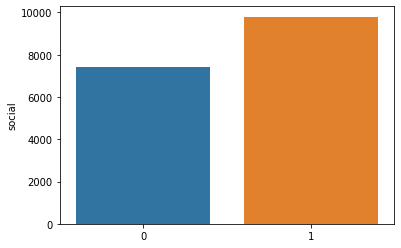

In [8]:
#Data analysis
x=df_social_train['social'].value_counts()
print(x)
sns.barplot(x.index,x)

1    7796
0    2764
Name: agency, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


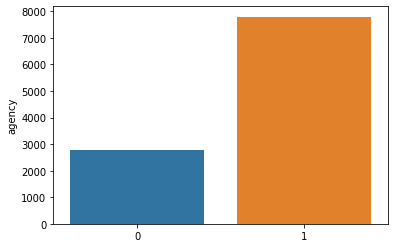

In [11]:
x=df_agency_train['agency'].value_counts()
print(x)
sns.barplot(x.index,x)

In [16]:
import nltk
nltk.download('punkt')

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:

# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
df_social_train['moment_tok']=[nltk.word_tokenize(i) for i in df_social_train['moment']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df_social_train['moment_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it


w2v = dict(zip(model.wv.index2word, model.wv.syn0))  #combination of word and its vector

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  # Remove the CWD from sys.path while we load stuff.


In [19]:
df_social_train.head()

,hmid,moment,social,moment_tok
0,0,taking my dog to her puppy class last wednesda...,0,"[taking, my, dog, to, her, puppy, class, last,..."
1,1,i was very happy when my daughter returned fro...,1,"[i, was, very, happy, when, my, daughter, retu..."
2,2,playing video games,0,"[playing, video, games]"
3,3,i watched some fun videos,0,"[i, watched, some, fun, videos]"
4,4,an event that made me happy was celebrating my...,1,"[an, event, that, made, me, happy, was, celebr..."
